In [1]:
import functions
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [17]:
import pandas as pd
temp = pd.read_csv("results_topology_mlp.csv", index_col=0)
temp

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
MLP_0_MSE,0.073775,1.589779,6.536905,1.680009,0.184450,41.613708,2.726064,1.139028,0.008379,0.075296,...,0.022748,0.880733,0.685984,0.070609,6.116871,0.423390,0.022167,0.015690,14.759925,472.059906
MLP_0_NSE,0.978035,0.942929,0.960370,0.871916,0.966177,0.971132,0.946083,0.955194,0.960061,0.949395,...,0.916814,0.972582,0.951746,0.983251,0.987321,0.630695,0.968762,0.974599,0.974958,0.771940
MLP_1_MSE,0.662025,2.621634,14.358335,1.653521,0.530045,89.493462,7.390948,2.040528,0.012038,0.378197,...,0.037743,0.766875,0.437732,0.074504,7.274236,0.881173,0.027978,0.012524,14.776373,465.270386
MLP_1_NSE,0.802897,0.905887,0.912952,0.873935,0.902805,0.937917,0.853819,0.919732,0.942620,0.745820,...,0.861979,0.976127,0.969209,0.982327,0.984922,0.231392,0.960572,0.979725,0.974930,0.775220
MLP_2_MSE,0.165622,1.262597,9.601241,1.552117,0.548275,52.428623,2.564669,0.728493,0.006989,0.050767,...,0.047592,0.949546,0.472808,0.098538,7.424146,1.088096,0.035176,0.019195,22.290518,440.054810
MLP_2_NSE,0.950690,0.954675,0.941792,0.881666,0.899462,0.963630,0.949275,0.971343,0.966686,0.965881,...,0.825964,0.970440,0.966742,0.976627,0.984611,0.050902,0.950428,0.968925,0.962182,0.787402
MLP_3_MSE,0.160732,2.191477,10.627748,1.837426,0.558346,72.153992,4.689670,0.920329,0.007146,0.059185,...,0.017305,0.958995,0.963962,0.083496,8.947851,0.714716,0.048516,0.026626,23.340483,508.496429
MLP_3_NSE,0.952146,0.921329,0.935569,0.859914,0.897616,0.949946,0.907246,0.963797,0.965938,0.960223,...,0.936718,0.970146,0.932193,0.980195,0.981453,0.376585,0.931629,0.956895,0.960400,0.754337
MLP_4_MSE,0.176049,2.538287,10.584627,2.644173,0.403979,70.962891,6.099137,0.589262,0.006355,0.116867,...,0.020576,1.342734,0.642136,0.101949,8.135208,0.873679,0.042750,0.037762,21.012016,351.697113
MLP_4_NSE,0.947585,0.908879,0.935831,0.798408,0.925922,0.950772,0.879369,0.976820,0.969708,0.921456,...,0.924757,0.958200,0.954831,0.975817,0.983137,0.237928,0.939755,0.938867,0.964351,0.830089


In [22]:
temp.loc[[f"MLP_{i}_NSE" for i in range(6)]].mean(1).std()

0.04898149417535755

In [4]:
with open("results_depth_isolated.txt") as f:
    results = f.read()
depths = range(1, 21)
resgcn_mse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[1]) for depth in depths])
resgcn_mse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[1]) for depth in depths])
resgcn_mse_confs = np.array([1.96 * std / (6 ** 0.5) for std in resgcn_mse_stds])
resgcn_nse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[2]) for depth in depths])
resgcn_nse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[2]) for depth in depths])
resgcn_nse_confs = np.array([1.96 * std / (6 ** 0.5) for std in resgcn_nse_stds])

In [5]:
with open("results_depth_gcnii.txt") as f:
    results = f.read()
depths = range(1, 21)
gcnii_mse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[1]) for depth in depths])
gcnii_mse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[1]) for depth in depths])
gcnii_mse_confs = np.array([1.96 * std / (6 ** 0.5) for std in gcnii_mse_stds])
gcnii_nse_means = np.array([float(results.split("\n\n")[depth - 1].split("\n")[12].split()[2]) for depth in depths])
gcnii_nse_stds = np.array([float(results.split("\n\n")[depth - 1].split("\n")[13].split()[2]) for depth in depths])
gcnii_nse_confs = np.array([1.96 * std / (6 ** 0.5) for std in gcnii_nse_stds])

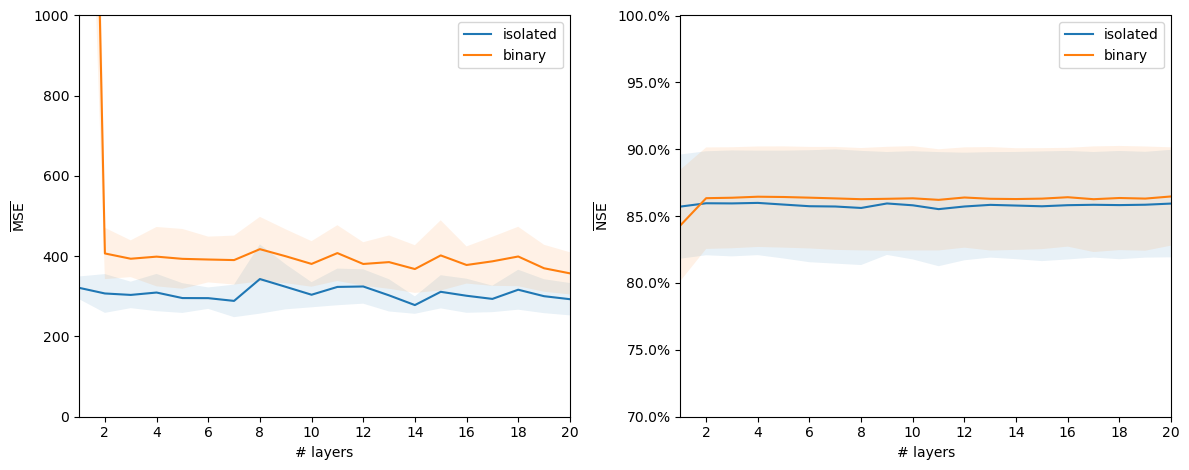

In [14]:
plt.figure(figsize=(12, 4.8))

plt.subplot(1, 2, 1)
plt.plot(depths, resgcn_mse_means, label="isolated")
plt.fill_between(depths, resgcn_mse_means + resgcn_mse_confs, resgcn_mse_means - resgcn_mse_confs, alpha=0.1)
plt.plot(depths, gcnii_mse_means, label="binary")
plt.fill_between(depths, gcnii_mse_means + gcnii_mse_confs, gcnii_mse_means - gcnii_mse_confs, alpha=0.1)
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2.0))
plt.ylim((0, 1000))
plt.xlabel("# layers")
plt.ylabel("$\overline{\mathrm{MSE}}$")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depths, resgcn_nse_means, label="isolated")
plt.fill_between(depths, resgcn_nse_means + resgcn_nse_confs, resgcn_nse_means - resgcn_nse_confs, alpha=0.1)
plt.plot(depths, gcnii_nse_means, label="binary")
plt.fill_between(depths, gcnii_nse_means + gcnii_nse_confs, gcnii_nse_means - gcnii_nse_confs, alpha=0.1)
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2.0))
plt.ylim((0.70, 1))
plt.xlabel("# layers")
plt.ylabel("$\overline{\mathrm{NSE}}$")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.legend()

plt.tight_layout()
plt.savefig("num_layers.pdf")
plt.show()